# An√°lisis del Rendimiento de Tiendas Alura

## Introducci√≥n

Este proyecto se centra en analizar los datos de ventas de cuatro tiendas para entender mejor su desempe√±o. El objetivo es identificar los aspectos clave que influyen en las ventas  y la satisfacci√≥n del cliente, para as√≠ poder tomar decisiones informadas y mejorar los resultados generales.

Utilic√© los datos hist√≥ricos de ventas de cada tienda, consolid√°ndolos para tener una visi√≥n completa. A partir de este an√°lisis, se busca ofrecer recomendaciones pr√°cticas.

## Objetivos Clave

-   Evaluar c√≥mo le fue a cada tienda en t√©rminos de ingresos y otras m√©tricas importantes.
-   Descubrir qu√© productos y categor√≠as se vendieron m√°s (y menos).
-   Analizar si hay alguna relaci√≥n entre lo que los clientes opinan (calificaciones), los ingresos y los costos de env√≠o.
-   Dar una recomendaci√≥n clara basada en una evaluaci√≥n general del rendimiento de cada tienda.

## Sobre los Datos

Los datos que analic√© vienen de cuatro archivos que contienen el detalle de cada venta: qu√© se vendi√≥, el precio, el costo de env√≠o, cu√°ndo y d√≥nde se hizo la venta, qui√©n vendi√≥, la calificaci√≥n del cliente
 y c√≥mo se pag√≥. Unifiqu√© toda esta informaci√≥n en una sola tabla para facilitar el an√°lisis.


### Importaci√≥n de datos



In [82]:
# Carga de datos y limpieza b√°sica con conversi√≥n num√©rica directa
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_columns', 100)

LINKS = [
  "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
  "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
  "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
  "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

dfs = []
for u in LINKS:
    if u.lower().endswith('.csv'):
        tmp = pd.read_csv(u)
    else:
        tmp = pd.read_excel(u)

    tmp = tmp.copy()
    # Extracci√≥n del nombre de la tienda desde la URL (b√°sico)
    name = u.split('/')[-1].split('.')[0].replace('%20', ' ').replace('_', ' ').strip().title() or 'Tienda'
    tmp['tienda'] = name
    dfs.append(tmp)

df_main = pd.concat(dfs, ignore_index=True)

# Convierte columnas clave a num√©rico, excluyendo 'Costo de env√≠o' from cleaning
for col in ['Precio', 'Calificaci√≥n']:
    if col in df_main.columns:
        # Limpieza b√°sica y conversi√≥n a num√©rico
        df_main[col] = pd.to_numeric(
            df_main[col].astype(str)
                                .str.replace('.', '', regex=False)
                                .str.replace(',', '', regex=False)
                                .str.replace('$', '', regex=False)
                                .str.replace(' ', '', regex=False),
            errors='coerce'
        )

print('‚úÖ Datos cargados unificados en un solo dataframe con los datos de las 4 tiendas, con limpieza b√°sica aplicada.')
display(df_main.sample(10))

‚úÖ Datos cargados unificados en un solo dataframe con los datos de las 4 tiendas, con limpieza b√°sica aplicada.


Producto   Categor√≠a del Producto    Precio  \
4217    Carrito de control remoto                 Juguetes    574000   
5373                    Bicicleta     Deportes y diversi√≥n   5070000   
8958      Bloques de construcci√≥n                 Juguetes    347000   
4055                 Celular ABXY             Electr√≥nicos  11150000   
8611              Cubo m√°gico 8x8                 Juguetes    182000   
8592  Ciencia de datos con Python                   Libros    693000   
1600                 Lavavajillas        Electrodom√©sticos  14640000   
6872                     Cama box                  Muebles   5647000   
6585              Olla de presi√≥n  Art√≠culos para el hogar    579000   
6182                Juego de mesa                 Juguetes   2489000   

      Costo de env√≠o Fecha de Compra         Vendedor Lugar de Compra  \
4217          3300.0      08/12/2020  Izabela de Le√≥n        Medell√≠n   
5373         27700.0      25/03/2022    Maria Alfonso        Riohacha   
8958             0.0      26/01/2021  Izabela de Le√≥n          Bogot√°   
4055         57600.0      27/12/2021   Juan Fernandez        Medell√≠n   
8611          1200.0      05/06/2021   Santiago Silva        Medell√≠n   
8592          1900.0      12/03/2023   Blanca Ramirez        Medell√≠n   
1600         78600.0      03/02/2021    Rafael Acosta         Leticia   
6872         28300.0      07/10/2022  Beatriz Morales        Medell√≠n   
6585          1300.0      15/05/2020    Lucas Olivera          Bogot√°   
6182         11400.0      05/01/2022    Rafael Acosta     Bucaramanga   

      Calificaci√≥n      M√©todo de pago  Cantidad de cuotas       lat  \
4217             4               Nequi                   1   6.25184   
5373             1  Tarjeta de cr√©dito                   2  11.54444   
8958             5  Tarjeta de cr√©dito                   1   4.60971   
4055             5  Tarjeta de cr√©dito                   1   6.25184   
8611             4               Nequi                   1   6.25184   
8592             5  Tarjeta de cr√©dito                   1   6.25184   
1600             5  Tarjeta de cr√©dito                   1  -4.21528   
6872             5               Nequi                   1   6.25184   
6585             5               Nequi                   1   4.60971   
6182             5               Nequi                   1   7.12539   

           lon    tienda  
4217 -75.56359  Tienda 2  
5373 -72.90722  Tienda 3  
8958 -74.08175  Tienda 4  
4055 -75.56359  Tienda 2  
8611 -75.56359  Tienda 4  
8592 -75.56359  Tienda 4  
1600 -69.94056  Tienda 1  
6872 -75.56359  Tienda 3  
6585 -74.08175  Tienda 3  
6182 -73.11980  Tienda 3

#1. An√°lisis de facturaci√≥n



In [83]:
# Identificar Top Categor√≠a y Producto por tienda
def valor_principal(series):
    if series.isna().all():
        return None
    c = Counter(series.dropna())
    return c.most_common(1)[0][0]

# C√°lculo de KPIs
kpis_calculados = df_main.groupby('tienda').agg(
    ingresos_totales=('Precio', 'sum'),
    rese√±a_promedio=('Calificaci√≥n', 'mean') if 'Calificaci√≥n' in df_main.columns else ('Precio', 'size'),
    envio_promedio=('Costo de env√≠o', 'mean') if 'Costo de env√≠o' in df_main.columns else ('Precio', 'size'),
    total_transacciones=('Precio', 'size'), # Asumiendo que cada fila es una transacci√≥n
    valor_promedio_transaccion=('Precio', 'mean')
).reset_index()

# Identificar Top Categor√≠a y Producto por tienda
resumen = []
for tienda, sub in df_main.groupby('tienda'):
    cat_top = valor_principal(sub['Categor√≠a del Producto']) if 'Categor√≠a del Producto' in df_main.columns else None
    prod_top = valor_principal(sub['Producto']) if 'Producto' in df_main.columns else None
    resumen.append({
        'tienda': tienda,
        'categoria_top': cat_top,
        'producto_top': prod_top,
    })
resumen = pd.DataFrame(resumen)

# Combinar KPIs y Top Productos/Categor√≠as
kpis_calculados = kpis_calculados.merge(resumen, on='tienda', how='left')

print('KPIs y Top Productos/Categor√≠as:')

# Formatear columnas num√©ricas para visualizaci√≥n
kpis_display = kpis_calculados.copy()
for col in kpis_display.columns:
    if col in ['ingresos_totales', 'envio_promedio', 'valor_promedio_transaccion']:
        kpis_display[col] = kpis_display[col].apply(lambda x: f'${x:,.0f}')
    elif kpis_display[col].dtype in ['int64', 'float64'] and col != 'rese√±a_promedio':
        kpis_display[col] = kpis_display[col].apply(lambda x: f'{x:,.0f}')
    elif col == 'rese√±a_promedio':
        kpis_display[col] = kpis_display[col].apply(lambda x: f'{x:,.2f}')

display(kpis_display)

KPIs y Top Productos/Categor√≠as:


tienda ingresos_totales rese√±a_promedio envio_promedio  \
0  Tienda 1  $11,508,804,000            3.98        $26,019   
1  Tienda 2  $11,163,435,000            4.04        $25,216   
2  Tienda 3  $10,980,196,000            4.05        $24,806   
3  Tienda 4  $10,383,757,000            4.00        $23,459   

  total_transacciones valor_promedio_transaccion categoria_top  \
0               2,359                 $4,878,679       Muebles   
1               2,359                 $4,732,274       Muebles   
2               2,359                 $4,654,598       Muebles   
3               2,358                 $4,403,629       Muebles   

                producto_top  
0                 Microondas  
1  Iniciando en programaci√≥n  
2              Kit de bancas  
3                   Cama box

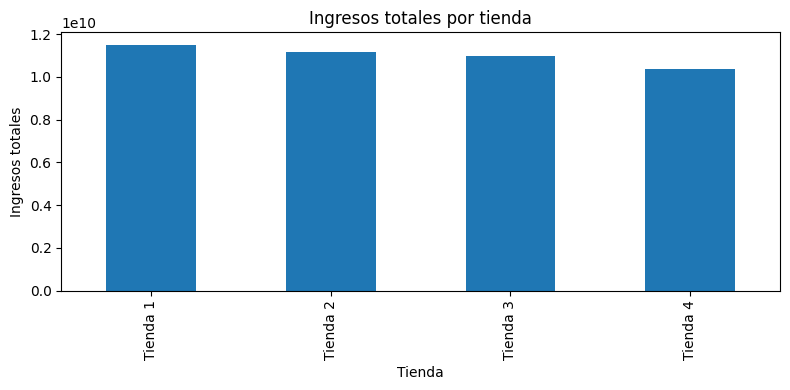

In [84]:
# Visualizaci√≥n - Barras de ingresos por tienda
plt.figure(figsize=(8,4))
kpis_calculados.set_index('tienda')['ingresos_totales'].sort_values(ascending=False).plot(kind='bar')
plt.title('Ingresos totales por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos totales')
plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

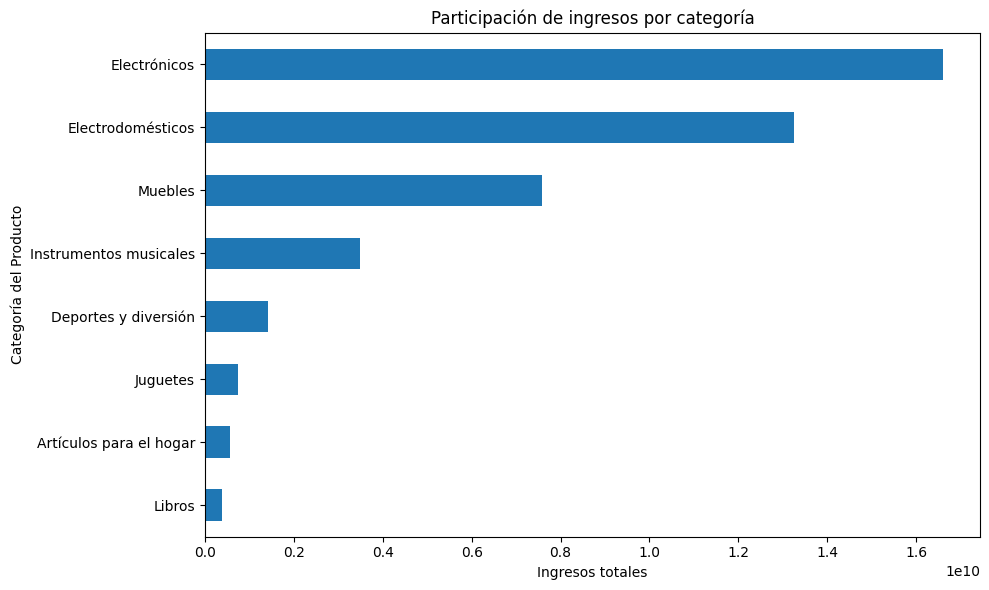

In [85]:
# Visualizaci√≥n - Barras de participaci√≥n por categor√≠a (global)
if 'Categor√≠a del Producto' in df_main.columns:
    cat_share = df_main.groupby('Categor√≠a del Producto')['Precio'].sum().sort_values(ascending=True) # Sort ascending for horizontal bar chart
    plt.figure(figsize=(10,6))
    cat_share.plot(kind='barh') # Use barh for horizontal bars
    plt.title('Participaci√≥n de ingresos por categor√≠a')
    plt.xlabel('Ingresos totales')
    plt.ylabel('Categor√≠a del Producto')
    plt.tight_layout()
    plt.show()
else:
    print('‚ö†Ô∏è No hay columna de categor√≠a en datos; se omite el gr√°fico de barras.')

In [86]:
# C√°lculo de ventas por categor√≠a por tienda
ventas_por_categoria_tienda = df_main.groupby(['tienda', 'Categor√≠a del Producto'])['Precio'].sum().unstack(fill_value=0)
print("\nVentas por categor√≠a por tienda:")
display(ventas_por_categoria_tienda)


Ventas por categor√≠a por tienda:


Categor√≠a del Producto  Art√≠culos para el hogar  Deportes y diversi√≥n  \
tienda                                                                  
Tienda 1                              126984000             392900000   
Tienda 2                              147469000             347445000   
Tienda 3                              150600000             355931000   
Tienda 4                              150745000             333501000   

Categor√≠a del Producto  Electrodom√©sticos  Electr√≥nicos  \
tienda                                                    
Tienda 1                       3636852000    4294935000   
Tienda 2                       3485678000    4108311000   
Tienda 3                       3292379000    4107758000   
Tienda 4                       2832602000    4094761000   

Categor√≠a del Producto  Instrumentos musicales   Juguetes     Libros  \
tienda                                                                 
Tienda 1                             912990000  179957000   87849000   
Tienda 2                            1049903000  159454000  100912000   
Tienda 3                             773809000  194011000   94987000   
Tienda 4                             751024000  202622000   93213000   

Categor√≠a del Producto     Muebles  
tienda                              
Tienda 1                1876337000  
Tienda 2                1764263000  
Tienda 3                2010721000  
Tienda 4                1925289000

# 3. Calificaci√≥n promedio de la tienda


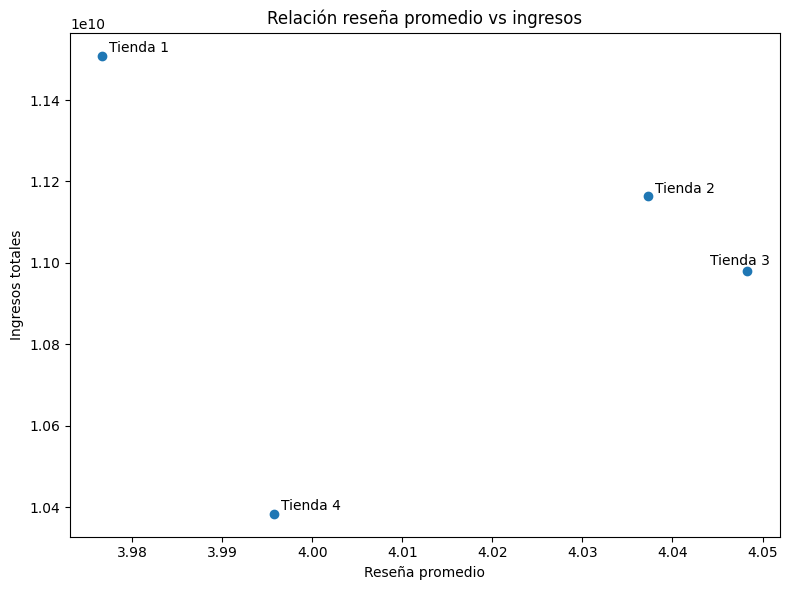

In [87]:
# Visualizaci√≥n - Dispersi√≥n rese√±a promedio vs ingresos
if 'rese√±a_promedio' in kpis_calculados.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(kpis_calculados['rese√±a_promedio'], kpis_calculados['ingresos_totales'])
    texts = []
    for _, r in kpis_calculados.iterrows():
        texts.append(plt.annotate(r['tienda'], (r['rese√±a_promedio'], r['ingresos_totales'])))
    # Use adjust_text to prevent overlaps
    from adjustText import adjust_text
    adjust_text(texts)
    plt.title('Relaci√≥n rese√±a promedio vs ingresos')
    plt.xlabel('Rese√±a promedio')
    plt.ylabel('Ingresos totales')
    plt.tight_layout()
    plt.show()
else:
    print('‚ö†Ô∏è No hay columna de rese√±a promedio en KPIs; se omite el gr√°fico de dispersi√≥n.')

In [88]:
# C√°lculo de calificaci√≥n promedio por tienda
calificacion_promedio_tienda = df_main.groupby('tienda')['Calificaci√≥n'].mean()
print("\nCalificaci√≥n promedio por tienda:")
display(calificacion_promedio_tienda)


Calificaci√≥n promedio por tienda:


tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificaci√≥n, dtype: float64

# 4. Productos m√°s y menos vendidos

In [89]:
# Identificar los 10 productos m√°s vendidos a nivel global y su categor√≠a, ordenados por categor√≠a
if 'Producto' in df_main.columns and 'Precio' in df_main.columns and 'Categor√≠a del Producto' in df_main.columns:
    # Calculate total sales per product
    product_sales = df_main.groupby('Producto')['Precio'].sum()

    # Get the top 10 products by sales
    top_10_products = product_sales.sort_values(ascending=False).head(10)

    # Get the category for each of the top 10 products
    # We need to find the category for each product in the top 10 list.
    # A simple way is to get the category from the first occurrence of each product in the original dataframe.
    top_10_products_info = df_main[df_main['Producto'].isin(top_10_products.index)][['Producto', 'Categor√≠a del Producto']].drop_duplicates(subset=['Producto'])

    # Combine the sales data with the category information
    top_10_with_category = top_10_products.reset_index().merge(top_10_products_info, on='Producto', how='left')

    # Sort the result by category
    top_10_with_category_sorted = top_10_with_category.sort_values(by='Categor√≠a del Producto')

    print("\nTop 10 productos m√°s vendidos (global) con su categor√≠a, ordenados por categor√≠a:")
    display(top_10_with_category_sorted[['Categor√≠a del Producto', 'Producto', 'Precio']])

elif 'Producto' in df_main.columns and 'Precio' in df_main.columns:
    # If category column is missing, just show top 10 products by sales
    top_10_products = df_main.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 productos m√°s vendidos (global):")
    display(top_10_products)
else:
    print("‚ö†Ô∏è Columnas 'Producto' o 'Precio' no encontradas; se omite el an√°lisis de top productos.")


Top 10 productos m√°s vendidos (global) con su categor√≠a, ordenados por categor√≠a:


Categor√≠a del Producto          Producto      Precio
2       Electrodom√©sticos      Refrigerador  3849374000
4       Electrodom√©sticos  Lavadora de ropa  2424686000
5       Electrodom√©sticos      Lavavajillas  2405365000
7       Electrodom√©sticos  Secadora de ropa  2102380000
0            Electr√≥nicos     TV LED UHD 4K  4324896000
1            Electr√≥nicos         Iphone 15  4010512000
3            Electr√≥nicos          Smart TV  2902218000
6            Electr√≥nicos       Tablet ABXY  2190128000
8            Electr√≥nicos      Celular ABXY  1579111000
9  Instrumentos musicales           Bater√≠a  1478063000

In [90]:
# Identificar los 10 productos menos vendidos a nivel global y su categor√≠a, ordenados por categor√≠a
if 'Producto' in df_main.columns and 'Precio' in df_main.columns and 'Categor√≠a del Producto' in df_main.columns:
    # Calculate total sales per product
    product_sales = df_main.groupby('Producto')['Precio'].sum()

    # Get the bottom 10 products by sales
    bottom_10_products = product_sales.sort_values(ascending=True).head(10)

    # Get the category for each of the bottom 10 products
    # We need to find the category for each product in the bottom 10 list.
    # A simple way is to get the category from the first occurrence of each product in the original dataframe.
    bottom_10_products_info = df_main[df_main['Producto'].isin(bottom_10_products.index)][['Producto', 'Categor√≠a del Producto']].drop_duplicates(subset=['Producto'])

    # Combine the sales data with the category information
    bottom_10_with_category = bottom_10_products.reset_index().merge(bottom_10_products_info, on='Producto', how='left')

    # Sort the result by category
    bottom_10_with_category_sorted = bottom_10_with_category.sort_values(by='Categor√≠a del Producto')


    print("\nTop 10 productos menos vendidos (global) con su categor√≠a, ordenados por categor√≠a:")
    display(bottom_10_with_category_sorted[['Categor√≠a del Producto', 'Producto', 'Precio']])


elif 'Producto' in df_main.columns and 'Precio' in df_main.columns:
    # If category column is missing, just show bottom 10 products by sales
    bottom_10_products = df_main.groupby('Producto')['Precio'].sum().sort_values(ascending=True).head(10)
    print("\nTop 10 productos menos vendidos (global):")
    display(bottom_10_products)
else:
    print("‚ö†Ô∏è Columnas 'Producto' o 'Precio' no encontradas; se omite el an√°lisis de top productos.")


Top 10 productos menos vendidos (global) con su categor√≠a, ordenados por categor√≠a:


Categor√≠a del Producto                 Producto    Precio
4  Art√≠culos para el hogar             Set de vasos  55842000
8  Art√≠culos para el hogar               Cuberter√≠a  85604000
1     Deportes y diversi√≥n       Cuerda para saltar  30683000
7     Deportes y diversi√≥n             Vaso t√©rmico  84974000
0                 Juguetes          Cubo m√°gico 8x8  27293000
2                 Juguetes           Dinosaurio Rex  31129000
3                 Juguetes        Ajedrez de madera  51491000
6                 Juguetes  Bloques de construcci√≥n  68021000
9                 Juguetes              Mu√±eca beb√©  85915000
5                   Libros  Dashboards con Power BI  64184000

# 5. Env√≠o promedio por tienda vs rese√±a promedio

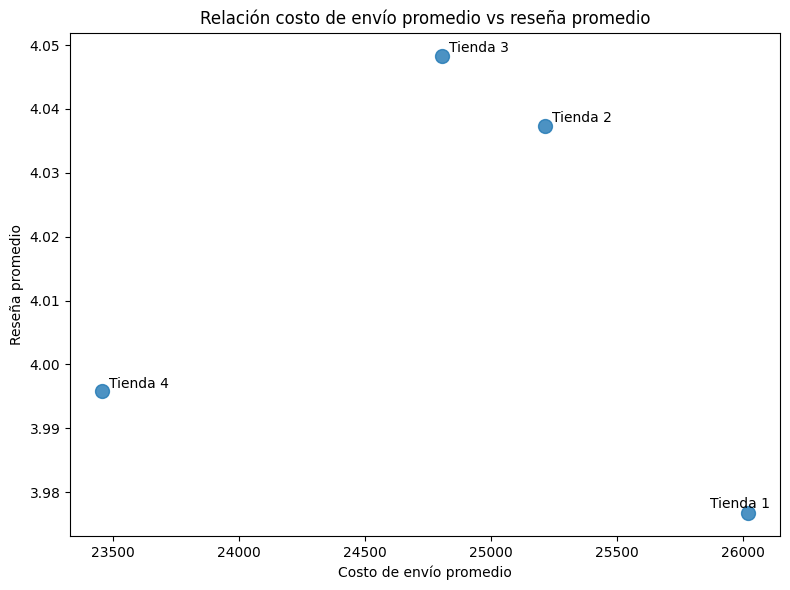

In [91]:
# Visualizaci√≥n - Dispersi√≥n costo de env√≠o promedio vs rese√±a promedio
if 'rese√±a_promedio' in kpis_calculados.columns and 'envio_promedio' in kpis_calculados.columns:
    plt.figure(figsize=(8,6))
    # Enhance the appearance of the scatter plot without using 'puntaje'
    plt.scatter(kpis_calculados['envio_promedio'], kpis_calculados['rese√±a_promedio'], s=100, alpha=0.8) # Increased size and alpha
    texts = []
    for _, r in kpis_calculados.iterrows():
        texts.append(plt.annotate(r['tienda'], (r['envio_promedio'], r['rese√±a_promedio'])))
    # Use adjust_text to prevent overlaps
    from adjustText import adjust_text
    adjust_text(texts)
    plt.title('Relaci√≥n costo de env√≠o promedio vs rese√±a promedio')
    plt.xlabel('Costo de env√≠o promedio')
    plt.ylabel('Rese√±a promedio')
    plt.tight_layout()
    plt.show()
else:
    print('‚ö†Ô∏è No hay columnas de rese√±a o env√≠o promedio en KPIs; se omite el gr√°fico de dispersi√≥n.')

In [92]:
# C√°lculo de env√≠o promedio por tienda
envio_promedio_tienda = df_main.groupby('tienda')['Costo de env√≠o'].mean()
print("\nCosto de env√≠o promedio por tienda:")
display(envio_promedio_tienda)


Costo de env√≠o promedio por tienda:


tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de env√≠o, dtype: float64

In [93]:
# Recomendaci√≥n autom√°tica
def norm_minmax(s):
    s = s.astype(float)
    if s.max() == s.min():
        return pd.Series([0.5]*len(s), index=s.index)
    return (s - s.min()) / (s.max() - s.min())

# Normalizaci√≥n simple para puntaje
k = kpis_calculados.copy()

k['n_ingresos'] = norm_minmax(k['ingresos_totales'])
k['n_rese√±a'] = norm_minmax(k['rese√±a_promedio']) if 'rese√±a_promedio' in k.columns else 0.5
k['n_envio'] = norm_minmax(k['envio_promedio']) if 'envio_promedio' in k.columns else 0.5

# Puntaje ponderado
k['puntaje'] = 0.4*k['n_ingresos'] + 0.4*k['n_rese√±a'] + 0.2*(1 - k['n_envio'])
k = k.sort_values('puntaje', ascending=True).reset_index(drop=True)
tienda_candidata = k.loc[0, 'tienda']
print('üìå Tienda candidata a vender (menor puntaje):', tienda_candidata)

# Formatear columnas num√©ricas para visualizaci√≥n
k_display = k.copy()
for col in k_display.columns:
    if col in ['ingresos_totales', 'envio_promedio']:
        # Formatear como moneda sin decimales
        k_display[col] = k_display[col].apply(lambda x: f'${x:,.0f}')
    elif k_display[col].dtype in ['int64', 'float64'] and col not in ['rese√±a_promedio', 'puntaje', 'n_ingresos', 'n_rese√±a', 'n_envio']:
        # Formatear otras columnas num√©ricas sin notaci√≥n cient√≠fica y sin decimales
        k_display[col] = k_display[col].apply(lambda x: f'{x:,.0f}')
    elif col in ['rese√±a_promedio', 'puntaje', 'n_ingresos', 'n_rese√±a', 'n_envio']:
        # Formatear these columns with two decimal places
        k_display[col] = k_display[col].apply(lambda x: f'{x:,.2f}')

# Renombrar columnas normalizadas para visualizaci√≥n
k_display.rename(columns={
    'n_ingresos': 'normalizado_ingresos',
    'n_rese√±a': 'normalizado_rese√±a',
    'n_envio': 'normalizado_envio'
}, inplace=True)


display(k_display[['tienda', 'ingresos_totales', 'rese√±a_promedio', 'envio_promedio', 'puntaje', 'normalizado_ingresos', 'normalizado_rese√±a', 'normalizado_envio']])


# Justificaci√≥n breve basada en el puntaje ponderado
fila = k.loc[0]
razones_puntaje = []

# Describe contribution of each factor to the low score
if 'n_ingresos' in fila and fila['n_ingresos'] < 0.5:
    razones_puntaje.append(f"su puntuaci√≥n normalizada de ingresos ({fila['n_ingresos']:.2f}) fue relativamente baja")
if 'n_rese√±a' in fila and fila['n_rese√±a'] < 0.5:
     razones_puntaje.append(f"su puntuaci√≥n normalizada de rese√±as ({fila['n_rese√±a']:.2f}) fue relativamente baja")
if 'n_envio' in fila and (1 - fila['n_envio']) < 0.5:
    razones_puntaje.append(f"su puntuaci√≥n normalizada de costo de env√≠o ({1 - fila['n_envio']:.2f}) fue relativamente baja (costo de env√≠o alto)")
elif 'n_envio' in fila and (1 - fila['n_envio']) > 0.5:
     razones_puntaje.append(f"su puntuaci√≥n normalizada de costo de env√≠o ({1 - fila['n_envio']:.2f}) fue relativamente alta (costo de env√≠o bajo)")

print(f"\nüßæ Recomendaci√≥n: Vender la tienda '{tienda_candidata}'")
if razones_puntaje:
    print("porque:")
    for razon in razones_puntaje:
        print(f"- {razon}")
print(f"resultando en el puntaje ponderado m√°s bajo ({fila['puntaje']:.2f}).")

üìå Tienda candidata a vender (menor puntaje): Tienda 4


tienda ingresos_totales rese√±a_promedio envio_promedio puntaje  \
0  Tienda 4  $10,383,757,000            4.00        $23,459    0.31   
1  Tienda 1  $11,508,804,000            3.98        $26,019    0.40   
2  Tienda 2  $11,163,435,000            4.04        $25,216    0.68   
3  Tienda 3  $10,980,196,000            4.05        $24,806    0.71   

  normalizado_ingresos normalizado_rese√±a normalizado_envio  
0                 0.00               0.27              0.00  
1                 1.00               0.00              1.00  
2                 0.69               0.85              0.69  
3                 0.53               1.00              0.53


üßæ Recomendaci√≥n: Vender la tienda 'Tienda 4'
porque:
- su puntuaci√≥n normalizada de ingresos (0.00) fue relativamente baja
- su puntuaci√≥n normalizada de rese√±as (0.27) fue relativamente baja
- su puntuaci√≥n normalizada de costo de env√≠o (1.00) fue relativamente alta (costo de env√≠o bajo)
resultando en el puntaje ponderado m√°s bajo (0.31).




---


```

```


---


---




##***Conclusiones y Recomendaciones***


---







Al analizar los datos de ventas de las cuatro tiendas, encontr√© algunos puntos importantes sobre su rendimiento.

**Lo que descubr√≠:**

*   **Ingresos:** Hay diferencias claras en los ingresos. La Tienda 1 es la que m√°s vende, mientras que la Tienda 4 vende menos.
*   **Productos Populares:** Las categor√≠as de Electr√≥nicos y Electrodom√©sticos son las que m√°s ingresos generan. Los productos m√°s vendidos suelen ser de estas √°reas (como la "TV LED UHD 4K" o el "Refrigerador"). Los menos vendidos son m√°s variados, incluyendo cosas para el hogar, juguetes y libros.
*   **Opiniones y Env√≠os:** No hay una relaci√≥n directa simple entre las calificaciones de los clientes, los ingresos y los costos de env√≠o. Las tiendas 2 y 3 tienen buenas calificaciones y ventas s√≥lidas. La Tienda 1 logra los mayores ingresos, aunque sus calificaciones no son las m√°s altas, quiz√°s por el volumen de ventas. La Tienda 4 tiene el env√≠o m√°s barato, pero tambi√©n los ingresos y calificaciones m√°s bajos.

**Mi recomendaci√≥n:**

Considerando los ingresos, las calificaciones y el costo de env√≠o, la **Tienda 4** es la que tiene el rendimiento m√°s bajo seg√∫n mi an√°lisis.

**¬øPor qu√© recomiendo esto?**

La Tienda 4 obtuvo el puntaje m√°s bajo (0.31) principalmente debido a sus menores ingresos totales (puntaje normalizado de 0.00) y una rese√±a promedio ligeramente inferior (puntaje normalizado de 0.27) en comparaci√≥n con las otras tiendas. Aunque tiene un costo de env√≠o promedio favorable (puntaje normalizado de 1.00 en el factor inverso del env√≠o), este no fue suficiente para compensar el menor rendimiento en ingresos y rese√±as en el c√°lculo del puntaje general.

**Pr√≥ximos Pasos:**

Sugiero investigar m√°s a fondo qu√© est√° pasando en la Tienda 4. Podr√≠amos ver qu√© opinan los clientes, c√≥mo funciona su marketing o si los precios son competitivos. Aprender de lo que hacen bien las tiendas 1, 2 y 3 podr√≠a ayudarnos a mejorar la Tienda 4, en su defecto si se quiere poner en venta la tienda No 4.
